In [1]:
from _config import *

import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import colormaps
tab20 = colormaps['tab20']

In [2]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
df = pd.DataFrame({'x': x, 'density': stats.norm.pdf(x, mu, sigma), 'prob': stats.norm.cdf(x, mu, sigma)})

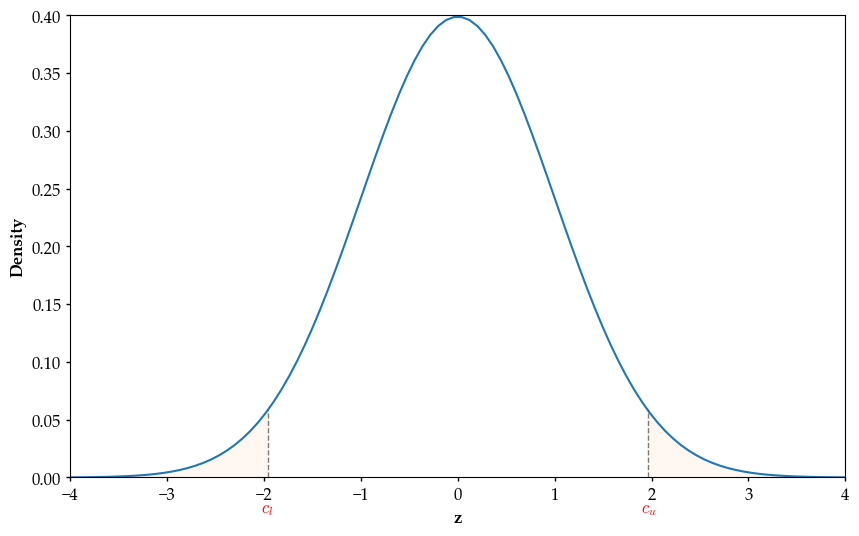

In [3]:
c1 = stats.norm.ppf(0.025)
c2 = stats.norm.ppf(0.975)

f, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data = df, x = 'x', y = 'density', ax = ax, color = tab20(0))

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.4)
ax.set_xlabel('z', fontsize = 12, fontweight = 'bold')
ax.set_ylabel('Density', fontsize = 12, fontweight = 'bold')

x_fill_l = np.linspace(-4, c1, 100)
y_fill_l = stats.norm.pdf(x_fill_l, 0, 1)
ax.fill_between(x_fill_l, y_fill_l, color = tab20(2), alpha = 0.05)

x_fill_u = np.linspace(c2, 4, 100)
y_fill_u = stats.norm.pdf(x_fill_u, 0, 1)
ax.fill_between(x_fill_u, y_fill_u, color = tab20(2), alpha = 0.05)

ax.annotate(r'$c_l$', xy=(c1, 0), xytext = (c1-0.07, -0.03), color = 'red', fontsize = 12)
ax.annotate(r'$c_u$', xy=(c2, 0), xytext = (c2-0.07, -0.03), color = 'red', fontsize = 12)

ax.vlines(c1, 0, stats.norm.pdf(c1), linestyles = 'dashed', linewidth = 1, color = 'black', alpha = 0.5)
ax.vlines(c2, 0, stats.norm.pdf(c2), linestyles = 'dashed', linewidth = 1, color = 'black', alpha = 0.5)

plt.show()
f.savefig('figures/norm_dist.png', format='png', dpi=1000, bbox_inches='tight')